<center>
<img src="logo.png" height="900"> 
</center>


# Контрольная работа :)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot') # стиль для графиков
%matplotlib inline

В файле `cr.csv` лежат результаты контрольной работы, которая проводилась в Вышке на факультете "Э".  По мнению студентов эти оценки смещённые, несостоятельные и ужасно неэффективные. Но это уже совершенно другая история. Подгрузим файлик и посмотрим на него!  

In [3]:
df = pd.read_csv('data/cr.csv', sep='\t')
print(df.shape)
df.head()

(389, 20)


,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,eds_python_2020_1,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,eds_python_2020_2,1.0,9.0,10.0,20.0,NaN,16.0,12.0,6.7,NaN,5.0,NaN,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,eds_python_2020_3,0.0,2.0,10.0,20.0,NaN,20.0,30.0,8.2,20.0,5.0,NaN,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,eds_python_2020_4,1.0,10.0,10.0,20.0,NaN,16.0,14.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,eds_python_2020_5,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


__Описание колонок:__


* `contest_login` - уникальный идентификатор студента
* `fraud` - в списывании скольки задач был уличён студент 
* `k1` - результат за первую контрольную, `k1a - k1f` в разбивке по задачам
* `k2` - результат за вторую контрольную, `k2a - k2f` в разбивке по задачам
* `k3` - результат за третью контрольную, `k3a - k3с` в разбивке по задачам

__а) Распределение результатов контрольной__ 

- Запишите все оценки за первую контрольную в переменную `x`, все пропуски удалите
- Найдите среднее и стандартное отклонение (используйте несмещённую оценку) 
- Постройте гистограмму результатов за первую контрольную 
- На этой же картинке постройте плотность нормального распределения со средним и стандартным отклонением, посчитанными выше

Похоже ли эмпирическое распределение на нормальное? 

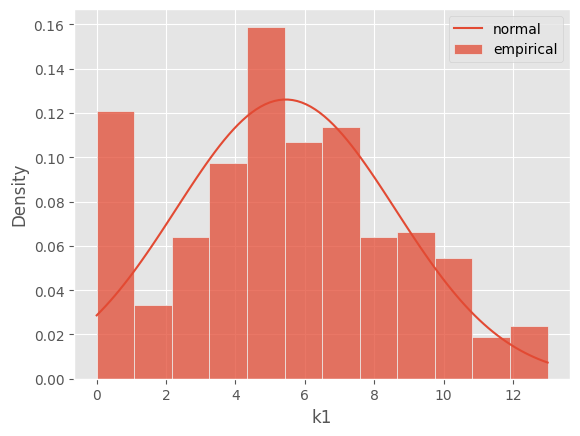

In [4]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

x = df['k1'].dropna()

x_mean = x.mean()
x_std = x.std(ddof = 1)
sns.histplot(x, kde = False, stat = 'density', label = 'empirical')
x_grid = np.linspace(x.min(), x.max(), 100)
plt.plot(x_grid, stats.norm.pdf(x_grid, loc = x_mean, scale = x_std), label = 'normal')
plt.legend()

In [5]:
# проверка, что среднее и стандартное откланение посчитаны корректно
assert np.abs(x_mean - 5.4478149100) < 1e-5

# похожие тесты на другие части задания скрыты от вас


По аналогии с тем, как это было сделано на лекции, проверьте с помощью теста Колмогорова-Смирнова гипотезу о нормальности: 

- Используйте функцию `kstest` из пакета `scipy`
- С помощью `.pvalue` вытащите из результатов теста p-значение, запишите его в переменную `pvalue`
- По аналогии запишите в `K` значение статистики Колмогорова
- Если p-значение оказалось больше $0.05$, гипотеза о нормальности данных не отвергается, и мы можем дальше использовать эту предпосылку

In [6]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

K, pvalue = stats.kstest(x, 'norm', args = (x_mean, x_std))
K, pvalue


(0.05124747789637904, 0.2500068105451755)

In [8]:
# проверка, что pvalue найдено корректно
assert np.abs(K - 0.051247) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Предположим невероятное! А именно, независимость и одинаковую распределённость наших наблюдений (никто не списывал контрольную друг у друга).

__б) Интервал для среднего.__ 

Постройте точный $95\%$-й доверительный интервал для ожидамоего результата за первую контрольную. В качестве оценки стандартного отклонения используйте несмещённый вариант, `ddof=1`. В переменные `left` и `right` запишите границы получившегося интервала. В переменную `delta` его ширину. 

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

alpha = 0.05

left, right = stats.t.interval(1 - alpha, len(x) - 1, loc = x_mean, scale = stats.sem(x, ddof = 1))
delta = right - left
left, right, delta

# your code here


(5.1324721374428055, 5.7631576826086075, 0.630685545165802)

In [14]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 5.13247213744281) < 1e-5

# похожие тесты на другие части задания скрыты от вас


__в) Ангелы и демоны__

Переменная`fraud` - в списывании скольки задач был уличён студент. Разобьём наши наблюдения на две группы: Ангелы и Демоны. У Ангелов `fraud == 0`, у Демонов `fraud > 0`. 

Запишите оценки за первую контрольную для ангелов в переменную `angels`, для демонов в `demons`. Все пропуски из выборки удалите. Постройте на общем фоне гистограмму распределения оценок за первую контрольную у Ангелов и Демонов. 

<Axes: xlabel='k1', ylabel='Density'>

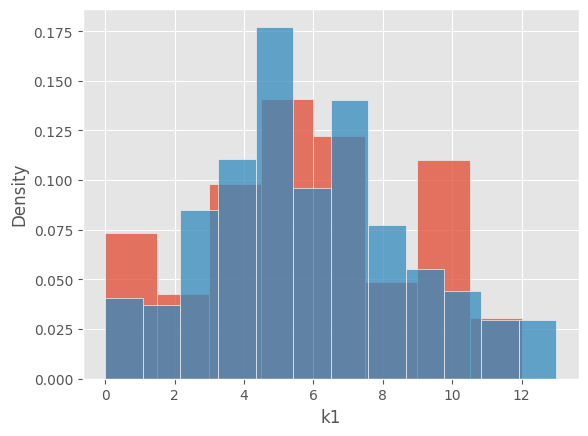

In [16]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

angels = df[df['fraud'] == 0]['k1'].dropna()
demons = df[df['fraud'] > 0]['k1'].dropna()

sns.histplot(angels, kde = False, stat = 'density', label = 'angels')
sns.histplot(demons, kde = False, stat = 'density', label = 'demons')


In [17]:
# проверка того, сколько в выборке оказалось ангелов и демонов
assert len(angels) == 109

# похожие тесты на другие части задания скрыты от вас


__г) Интервал для разницы средних__ 

Постройте примерный $95\%$-й доверительный интервал для разницы ожидаемого результата за первую контрольную у Ангелов и Демонов без предположения о равенстве дисперсий (интервал Уэлча). Для оценки всех дисперсий используйте несмещённый вариант. Заполните все переменные, перечисленные ниже. 

In [18]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

nu = (angels.std(ddof = 1)**2 / len(angels) + demons.std(ddof = 1)**2 / len(demons)) **2 / ((angels.std(ddof = 1)**2 / len(angels))**2 / (len(angels) - 1) + (demons.std(ddof = 1)**2 / len(demons))**2 / (len(demons) - 1))
left = (angels.mean() - demons.mean()) - (stats.t.ppf(0.975, nu) * np.sqrt(angels.std(ddof = 1)**2 / len(angels) + demons.std(ddof = 1)**2 / len(demons)))
right = (angels.mean() - demons.mean()) + (stats.t.ppf(0.975, nu) * np.sqrt(angels.std(ddof = 1)**2 / len(angels) + demons.std(ddof = 1)**2 / len(demons)))
delta = right - left

nu, left, right, delta


(191.6860656421598,
 -0.8045581262764355,
 0.5469728051755166,
 1.3515309314519521)

In [19]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.8045581262764373) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Входит ли в получившийся доверительный интервал ноль? Как думаете, что это означает? 

__д) Интервал для дисперсии__ 

Предположим, что математическое ожидание результата за контрольную зависит от уровня подготовки, а дисперсия результата — от нервов. Постройте для отношения нервозности Демонов и Ангелов $95\%$ доверительный интервал. Для оценки всех дисперсий используйте несмещённый вариант. 

In [20]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

alpha = 0.05
left =  demons.var(ddof = 1) / (angels.var(ddof = 1) * stats.f.ppf(1 - alpha / 2, len(demons) - 1, len(angels) - 1))
right = demons.var(ddof = 1) / (angels.var(ddof = 1) * stats.f.ppf(alpha / 2, len(demons) - 1, len(angels) - 1))
delta = right - left

left, right, delta

(0.6120428247687729, 1.1623835577954729, 0.5503407330267)

In [22]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 0.6120428247687726) < 1e-5

# похожие тесты на другие части задания скрыты от вас

Вошла ли в доверительный интервал единица? Как думаете, что это означает? 

__е) Ангелы и демоны решают задачки__ 

Нарисуйте картинку для корреляционной матрицы по задачам первой контрольной для всех наблюдений, отдельно для Ангелов и Демонов. Пропуски заполните нулями. Будем считать, что если у студента нет оценки, он не выполнял это задание. Для подсчёта корреляций используйте метод `.corr`. Для отрисовки матриц функцию `heatmap` из пакета `seaborn`. Для ангелов неплохо подойдёт цветовая схема `YlGnBu`. Для демонов подходит схема `gist_heat_r`.

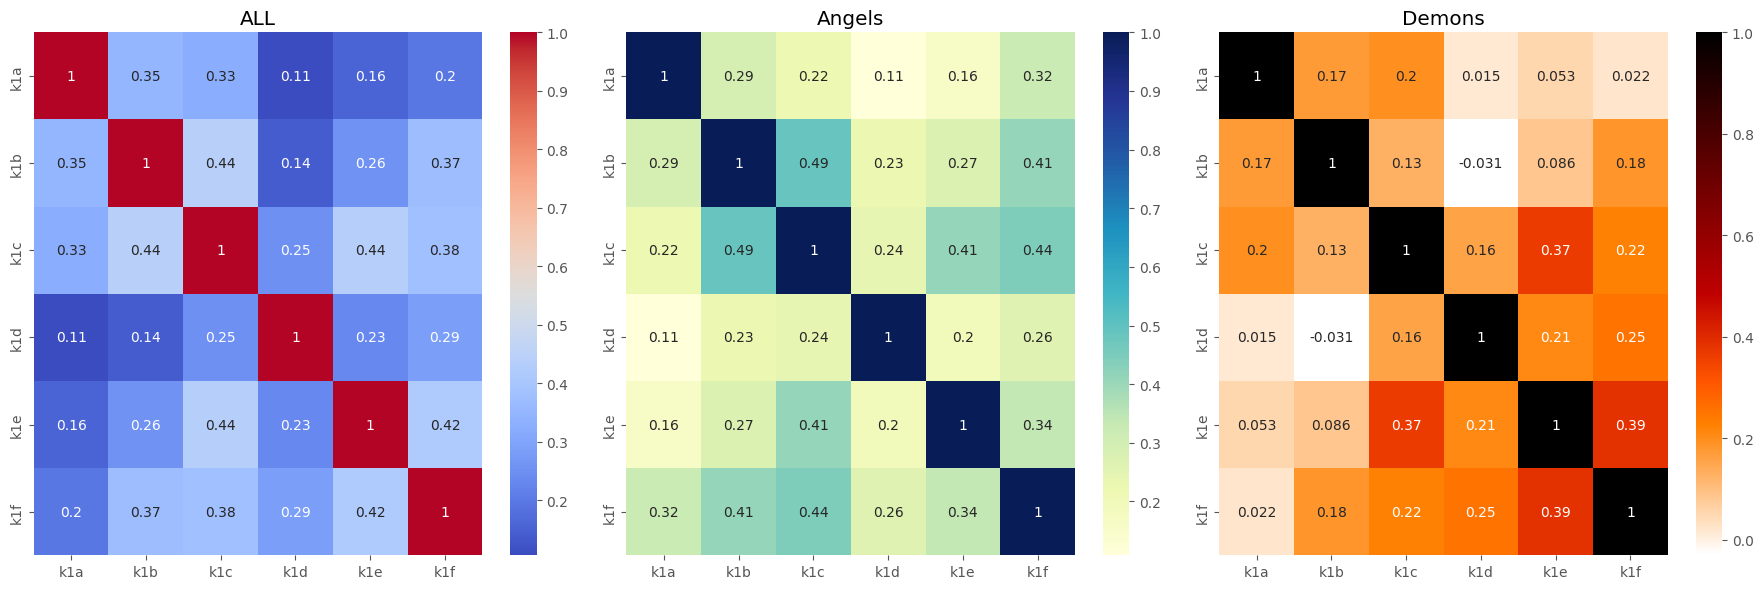

In [26]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

tasks = ['k1a', 'k1b', 'k1c', 'k1d', 'k1e', 'k1f']

plt.figure(figsize=(18, 6))  # Width = 18 inches, Height = 6 inches

plt.subplot(131)
sns.heatmap(df[tasks].fillna(0).corr(), annot=True, cmap='coolwarm')
plt.title('ALL')

plt.subplot(132)
sns.heatmap(df[df['fraud'] == 0][tasks].fillna(0).corr(), annot=True, cmap='YlGnBu')
plt.title('Angels')

plt.subplot(133)
sns.heatmap(df[df['fraud'] > 0][tasks].fillna(0).corr(), annot=True, cmap='gist_heat_r')
plt.title('Demons')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Между баллом за какие задачи самая высокая корреляция у Ангелов? В грейдер отправьте название колонок в порядке возрастания через запятую. __Например:__ `("k1a", "k1f")`. 

In [27]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ca = df[df['fraud'] == 0][tasks].fillna(0).corr()
cd = df[df['fraud']>0][tasks].fillna(0).corr()   

cau = ca.unstack()[ca.unstack() != 1]
cdu = cd.unstack()[cd.unstack() != 1]

names_angels = tuple(sorted(cau.sort_values(ascending = False).head(1).index[0]))
names_demons =  tuple(sorted(cdu.sort_values(ascending = False).head(1).index[0]))

names_angels, names_demons

(('k1b', 'k1c'), ('k1e', 'k1f'))

In [28]:
# проверка вашего ответа скрыта от вас

Как думаете, какие задачи было тяжелее всего списать? 

__ё) Доля написавших третью контрольную.__

Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

У студентов был выбор: писать или не писать третью контрольную. Если в колонке `k3` стоит $0$, значит студент не стал это делать. Постройте асимптотический $95\%$-й доверительный интервал для разницы долей Ангелов и Демонов, которые решили писать третью контрольную. 

__Примечание:__ На практике, если мы пользуемся асимптотическими доверительными интервалами, мы можем искать границы двумя способами:

* __Первый__ состоит в том, что мы оцениваем стандартное отклонение с помощью $\sqrt{\hat{p} \cdot (1 - \hat{p})} = \sqrt{\frac{1}{n} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 
* __Второй способ__ состоит в том, чтобы оценить стандартное отклонение как  $\sqrt{\frac{1}{n-1} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 

В плане асимптотики это не влияет на выводы, так как обе этих оценки состоятельно оценивают дисперсию. Можно пользоваться любым. Однако, чтобы с грейдером не было проблем и задание зачлось, воспользуйтесь первым способом. 

In [29]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
pa = (df[df['fraud'] == 0]['k3'] != 0).mean()
na = len(df[df['fraud'] == 0])
pd = (df[df['fraud'] > 0]['k3'] != 0).mean()
nd = len(df[df['fraud'] > 0])
diff = np.sqrt(pa * (1 - pa) / na + pd * (1 - pd) / nd)

alpha = 0.05
left = (pa - pd) - (stats.norm.ppf(1 - alpha / 2) * diff)
right = (pa - pd) + (stats.norm.ppf(1 - alpha / 2) * diff)
delta = right - left
left, right, delta


(-0.1884946955049297, 0.03341212669759032, 0.22190682220252)

In [30]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.1885) < 1e-3

# похожие тесты на другие части задания скрыты от вас


Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

__ж) Снова разница средних__ 

Посмотрим на результаты студентов в динамике. Постройте точный $95\%$ доверительный интервал для средней разницы оценок за вторую и первую контрольные. Пропуски в данных заполните нулями. 

In [31]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

alpha = 0.05
left = (df['k2'].fillna(0) - df['k1'].fillna(0)).mean() - stats.t.ppf(1 - alpha / 2, len(df['k2'].fillna(0) - df['k1'].fillna(0)) - 1) * stats.sem(df['k2'].fillna(0) - df['k1'].fillna(0), ddof = 1)
right = (df['k2'].fillna(0) - df['k1'].fillna(0)).mean() + stats.t.ppf(1 - alpha / 2, len(df['k2'].fillna(0) - df['k1'].fillna(0)) - 1) * stats.sem(df['k2'].fillna(0) - df['k1'].fillna(0), ddof = 1)
delta = right - left

left, right, delta


(-1.4562881732820105, -0.7072079706768586, 0.749080202605152)

In [32]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 1.4562881732820103) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

Это домашка подошла к концу. Поздравляю! Теперь вы умеете строить точные доверительные интервалы для нормальных выборок.